## Question from StrataScratch

What happens when the sampling distribution is altered
(e.g. filtering out all values below the mean) and
how does it effect type 1 errors?

## My Answer 

First of all, we should define: what the "sampling distribution" is?

Lets assume the "sampling distribution" is the distibution of our sample statistic, for exaple - sample means distribution. Then we have to understand - what do we use this distibution for?

If we use the distribution to costruct Confidence Interval, then we will incorrect interval bounds. Let's assume we want to calculate 10% CI for the M[X]. Then, if we alter the distibution - we will alter both of our bounds. Because our 5% percentille and 95% percentile that we would take as bounds will be differrent from real one. CI will be shifted far more to the right side and left tail will be completely removed. So, type 1 error will rise.

Example:

Assume, the null hypothesis is true.

Before altering our sampling distribution has:

sample mean = 505% percentile = 255 95% percentile = 75$ ,

so, we will get re result that less than 25or more than 75ormorethan75, then will reject null hypthesis and make 1 type error.

After altering our sampling distribution has:

sample mean = 555% percentile = 515 95% percentile = 80$ ,

Now, when we get less then 51$ we will reject the null hypothesis, it's much ofter than before altering, so fpr will be higher

In [9]:
# let's check this out !

import scipy.stats as sps
import numpy as np 
import seaborn as sns

In [26]:
N = 100
NN = int(1e4)

sampling_distribution = np.mean(sps.norm().rvs(N * NN).reshape(N, NN), axis=0)
alt_sampling_distribution = sampling_distribution[np.where(sampling_distribution >= 0)]

In [27]:
alt_sampling_distribution

array([0.0966929 , 0.14757857, 0.0328777 , ..., 0.1071294 , 0.12333969,
       0.04914578])

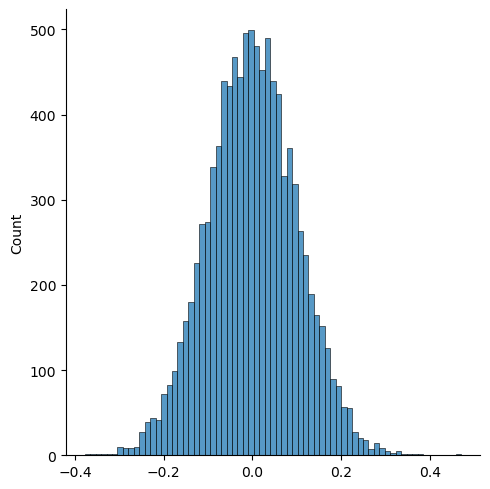

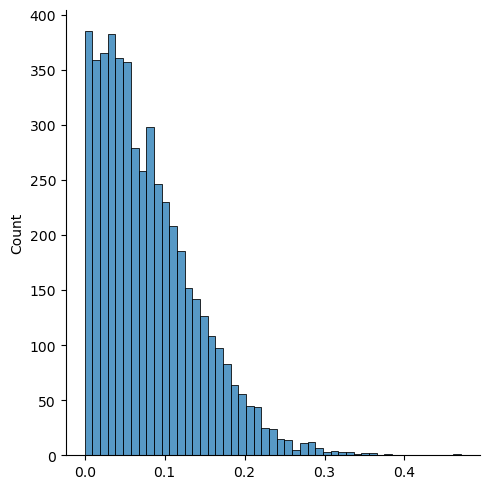

In [28]:
sns.displot(sampling_distribution)
sns.displot(alt_sampling_distribution)

In [36]:
true_lower_bound, true_upper_bound = np.percentile(sampling_distribution, [5, 95])
false_lower_bound, false_upper_bound = np.percentile(alt_sampling_distribution, [5, 95])

In [37]:
true_upper_bound, false_upper_bound

(0.16535314192147607, 0.19760064796477436)

In [46]:
experiments_means = np.mean(sps.norm().rvs(N * NN).reshape(N, NN), axis=0)

In [48]:
true_fp = sum([1 for x in experiments_means if (x < true_lower_bound) or (x > true_upper_bound)])
print(true_fp / NN)

0.0972


In [49]:
altered_fp = sum([1 for x in experiments_means if (x < false_lower_bound) or (x > false_upper_bound)])
print(altered_fp / NN)

0.5524
